<h1><center> 
   Bootstrap, Jackknife, and EM</center> </h1>
   


### Exercise 1

**Explain all parts in video**

Consider the `scor` data from the `bootstrap` package. It gives the test scores for 88 students in five subjects: mechanics, vectors, algebra, analysis, and statistics.

In [33]:
install.packages("bootstrap")
library("bootstrap")
scor

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



mec vec alg ana sta
1  77  82  67  67  81 
2  63  78  80  70  81 
3  75  73  71  66  81 
4  55  72  63  70  68 
5  63  63  65  70  63 
6  53  61  72  64  73 
7  51  67  65  65  68 
8  59  70  68  62  56 
9  62  60  58  62  70 
10 64  72  60  62  45 
11 52  64  60  63  54 
12 55  67  59  62  44 
13 50  50  64  55  63 
14 65  63  58  56  37 
15 31  55  60  57  73 
16 60  64  56  54  40 
17 44  69  53  53  53 
18 42  69  61  55  45 
19 62  46  61  57  45 
20 31  49  62  63  62 
21 44  61  52  62  46 
22 49  41  61  49  64 
23 12  58  61  63  67 
24 49  53  49  62  47 
25 54  49  56  47  53 
26 54  53  46  59  44 
27 44  56  55  61  36 
28 18  44  50  57  81 
29 46  52  65  50  35 
30 32  45  49  57  64 
⋮  ⋮   ⋮   ⋮   ⋮   ⋮  
59 43  43  38  34  49 
60 39  46  46  32  43 
61 62  44  36  22  42 
62 48  38  41  44  33 
63 34  42  50  47  29 
64 18  51  40  56  30 
65 35  36  46  48  29 
66 59  53  37  22  19 
67 41  41  43  30  33 
68 31  52  37  27  40 
69 17  51  52  35  31 
70 34  30  50  47  36 
71 46  40  47  29  17 
72 10  46  36  47  39 
73 46  37  45  15  30 
74 30  34  43  46  18 
75 13  51  50  25  31 
76 49  50  38  23   9 
77 18  32  31  45  40 
78  8  42  48  26  40 
79 23  38  36  48  15 
80 30  24  43  33  25 
81  3   9  51  47  40 
82  7  51  43  17  22 
83 15  40  43  23  18 
84 15  38  39  28  17 
85  5  30  44  36  18 
86 12  30  32  35  21 
87  5  26  15  20  20 
88  0  40  21   9  14

#### a) Because mechanics and vectors were closed book tests while the other three subjects were open book tests, it can be interesting to look at the correlation between mechanics and vectors versus the correlation between analysis and statistics versus the correlation between mechanics and statistics. Report these three correlations and then find the bootstrap estimates of the standard error and bias of the sample correlations. Use 2000 bootstrap replications for each. Then please combine these results in a table. Also make  histograms of the bootstrapped correlations (3, one for each correlation).

**hint** When I use set.seed(1), the bootstrapped bias between Mechanics and Vectors is `-0.0057183621`.


In [34]:
#score data correlations
theta_mec_vec=cor(scor["mec"],scor["vec"])
cat("\n Correlaion between mechanics and vectors :",theta_mec_vec)
theta_ana_stat=cor(scor["ana"],scor["sta"])
cat("\n Correlaion between analysis and statistics:",theta_ana_stat)
theta_mec_stat=cor(scor["mec"],scor["sta"])
cat("\n Correlaion between mechanics and statistics:",theta_mec_stat)


 Correlaion between mechanics and vectors : 0.5534052
 Correlaion between analysis and statistics: 0.6071743
 Correlaion between mechanics and statistics: 0.3890993

In [35]:
set.seed(1)
#bootstrap settings
B <- 2000
#vectors to store results
bootstrapped_sample_cor_mec_vec <- rep(NA, B)
bootstrapped_sample_cor_ana_stat <- rep(NA, B)
bootstrapped_sample_cor_mec_stat <- rep(NA, B)


for (b in 1:B) {
  #generate bootstrap samples using sample function
  bootstrapped_sample <- scor[sample(1:nrow(scor), size = 88, replace = TRUE), ]
  #calculate correlations
  bootstrapped_sample_cor_mec_vec[b] <- cor(bootstrapped_sample$mec, bootstrapped_sample$vec)
  bootstrapped_sample_cor_ana_stat[b] <- cor(bootstrapped_sample$ana, bootstrapped_sample$sta)
  bootstrapped_sample_cor_mec_stat[b] <- cor(bootstrapped_sample$mec, bootstrapped_sample$sta)
}
# standard error and bias
SE_mec_vec=sd(bootstrapped_sample_cor_mec_vec)
Bias_mec_vec=mean(bootstrapped_sample_cor_mec_vec)-theta_mec_vec
cat("\n Standard Error of Mechanics & Vectors correlation for Bootstrapped sample:",SE_mec_vec)
cat("\n Bias of Mechanics & Vectors correlation for Bootstrapped sample:",Bias_mec_vec)

SE_ana_stat=sd(bootstrapped_sample_cor_ana_stat)
Bias_ana_stat=mean(bootstrapped_sample_cor_ana_stat)-theta_ana_stat
cat("\n\n Standard Error of Analytics & Statistics correlation for Bootstrapped sample:",SE_ana_stat)
cat("\n Bias of Analytics & Statistics correlation for Bootstrapped sample:",Bias_ana_stat)

SE_mec_stat=sd(bootstrapped_sample_cor_mec_stat)
Bias_mec_stat=mean(bootstrapped_sample_cor_mec_stat)-theta_mec_stat
cat("\n\n Standard Error of Mechanics & Statistics correlation for Bootstrapped sample:",SE_mec_stat)
cat("\n Bias of Mechanics & Statistics correlation for Bootstrapped sample:",Bias_mec_stat)



 Standard Error of Mechanics & Vectors correlation for Bootstrapped sample: 0.07565361
 Bias of Mechanics & Vectors correlation for Bootstrapped sample: -0.005718362

 Standard Error of Analytics & Statistics correlation for Bootstrapped sample: 0.06759854
 Bias of Analytics & Statistics correlation for Bootstrapped sample: -0.002754829

 Standard Error of Mechanics & Statistics correlation for Bootstrapped sample: 0.1015015
 Bias of Mechanics & Statistics correlation for Bootstrapped sample: -0.00315025

In [36]:
#create a dataframe to show results as table
bootstrap_results <- data.frame(
  Pair = c("Mechanics-Vectors", "Analysis-Statistics", "Mechanics-Statistics"),
  Score_Correlation = c(theta_mec_vec, theta_ana_stat, theta_mec_stat),
  Bootstrap_SE = c(SE_mec_vec, SE_ana_stat, SE_mec_stat),
  Bootstrap_Bias = c(Bias_mec_vec, Bias_ana_stat, Bias_mec_stat)
)
bootstrap_results

Pair                 Score_Correlation Bootstrap_SE Bootstrap_Bias
1 Mechanics-Vectors    0.5534052         0.07565361   -0.005718362  
2 Analysis-Statistics  0.6071743         0.06759854   -0.002754829  
3 Mechanics-Statistics 0.3890993         0.10150153   -0.003150250

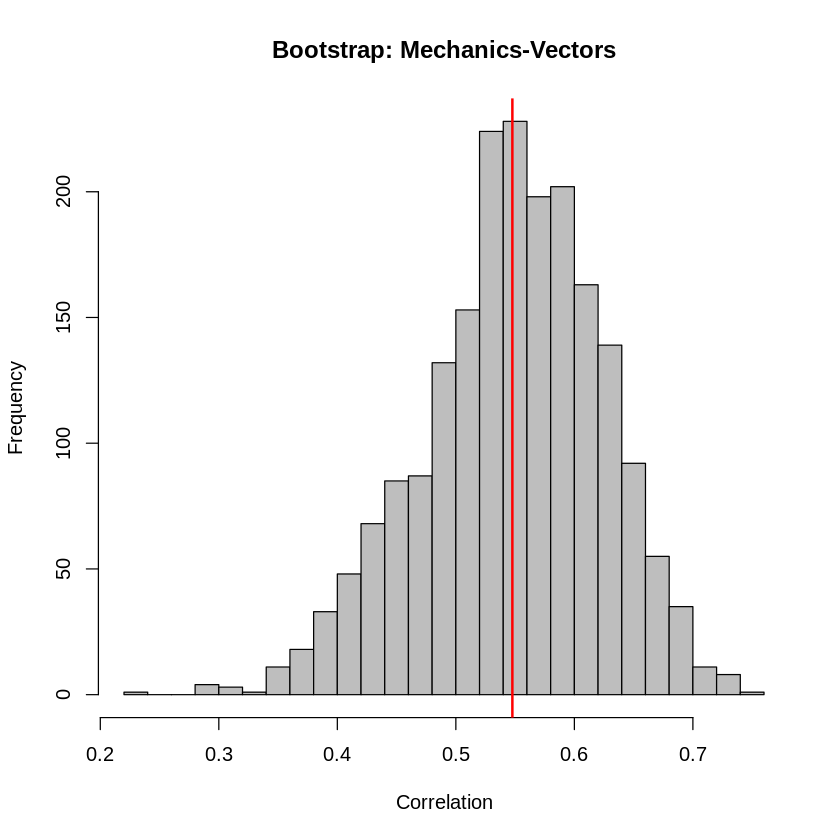

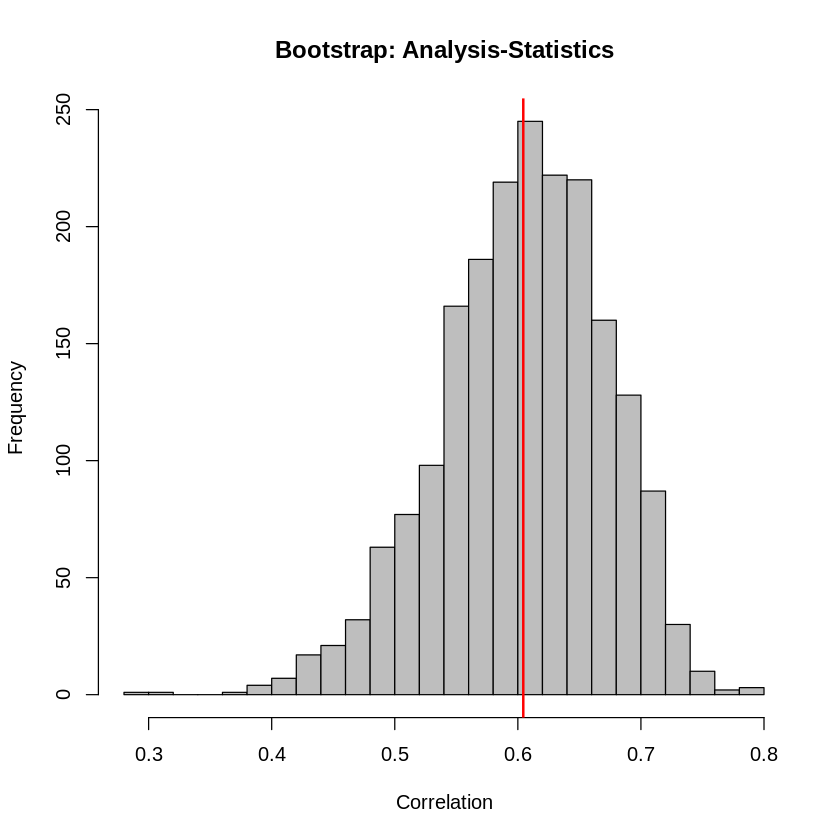

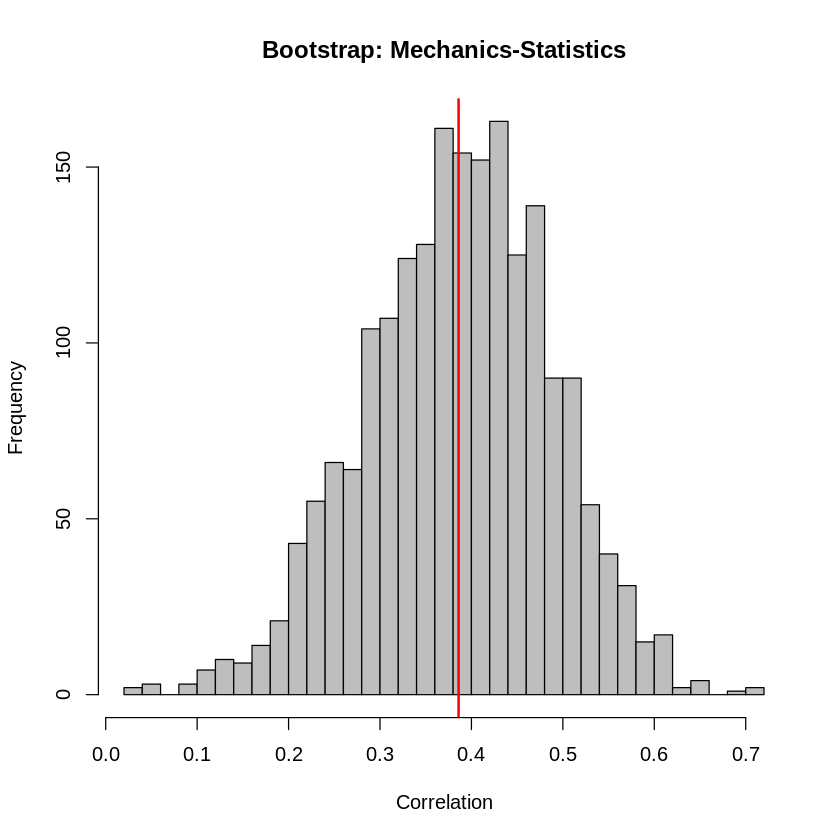

In [37]:
#Bootstrap Histograms
hist(bootstrapped_sample_cor_mec_vec,
     main = "Bootstrap: Mechanics-Vectors",
     xlab = "Correlation",
     ylab = "Frequency",
     col = "grey",
     breaks = 30)
abline(v = mean(bootstrapped_sample_cor_mec_vec), col = "red", lwd = 2)

hist(bootstrapped_sample_cor_ana_stat,
     main = "Bootstrap: Analysis-Statistics",
     xlab = "Correlation",
     ylab = "Frequency",
     col = "grey",
     breaks = 30)
abline(v = mean(bootstrapped_sample_cor_ana_stat), col = "red", lwd = 2)

hist(bootstrapped_sample_cor_mec_stat,
     main = "Bootstrap: Mechanics-Statistics",
     xlab = "Correlation",
     ylab = "Frequency",
     col = "grey",
     breaks = 30)
abline(v = mean(bootstrapped_sample_cor_mec_stat), col = "red", lwd = 2)

#### b) Also report the jackknife estimates of the bias and standard error for the sample correlations (between mechanics and vectors; between analysis and statistics; and between mechanics and statistics). Please put these in a table as well and make histograms!

**hint** For the jackknifed bias between Mechanics and Vectors, I got `-0.005038`.




In [38]:
#Jack knife settings
J <- nrow(scor)
#vectors to store results
jackknife_sample_cor_mec_vec <- rep(NA, J)
jackknife_sample_cor_ana_stat <- rep(NA, J)
jackknife_sample_cor_mec_stat <- rep(NA, J)


for (j in 1:J) {
  #generate jootstrap samples using sample function
  jackknife_sample <- scor[-j,]
  #calculate correlations
  jackknife_sample_cor_mec_vec[j] <- cor(jackknife_sample$mec, jackknife_sample$vec)
  jackknife_sample_cor_ana_stat[j] <- cor(jackknife_sample$ana, jackknife_sample$sta)
  jackknife_sample_cor_mec_stat[j] <- cor(jackknife_sample$mec, jackknife_sample$sta)
}

# Mechanics & Vectors
mean_mec_vec_jk <- mean(jackknife_sample_cor_mec_vec)
Bias_mec_vec_jk <- (J - 1) * (mean_mec_vec_jk - theta_mec_vec)
SE_mec_vec_jk <- sqrt((J - 1) / J * sum((jackknife_sample_cor_mec_vec - mean_mec_vec_jk)^2))

# Analysis & Statistics
mean_ana_stat_jk <- mean(jackknife_sample_cor_ana_stat)
Bias_ana_stat_jk <- (J - 1) * (mean_ana_stat_jk - theta_ana_stat)
SE_ana_stat_jk <- sqrt((J - 1) / J * sum((jackknife_sample_cor_ana_stat - mean_ana_stat_jk)^2))

# Mechanics & Statistics
mean_mec_stat_jk <- mean(jackknife_sample_cor_mec_stat)
Bias_mec_stat_jk <- (J - 1) * (mean_mec_stat_jk - theta_mec_stat)
SE_mec_stat_jk <- sqrt((J - 1) / J * sum((jackknife_sample_cor_mec_stat - mean_mec_stat_jk)^2))



In [39]:
#create a dataframe to show results as table
Jacknife_results <- data.frame(
  Pair = c("Mechanics-Vectors", "Analysis-Statistics", "Mechanics-Statistics"),
  Score_Correlation = c(theta_mec_vec, theta_ana_stat, theta_mec_stat),
  Jackknife_SE = c(SE_mec_vec_jk, SE_ana_stat_jk, SE_mec_stat_jk),
  Jacknife_Bias = c(Bias_mec_vec_jk, Bias_ana_stat_jk, Bias_mec_stat_jk)
)
Jacknife_results

Pair                 Score_Correlation Jackknife_SE Jacknife_Bias
1 Mechanics-Vectors    0.5534052         0.07752814   -0.005038361 
2 Analysis-Statistics  0.6071743         0.06918566   -0.001465958 
3 Mechanics-Statistics 0.3890993         0.11040404   -0.003461832

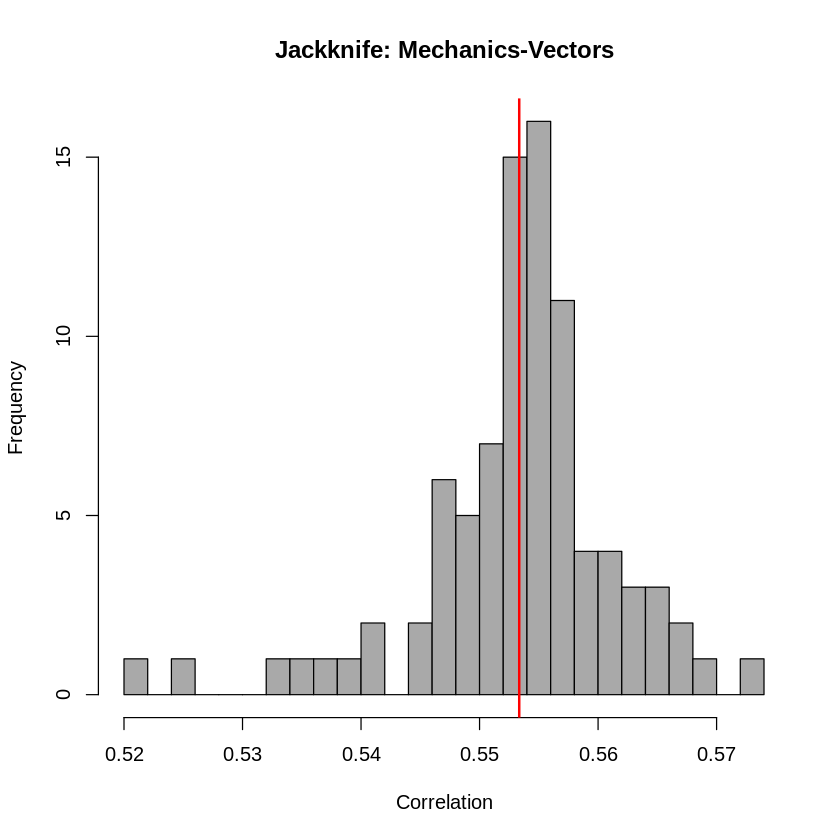

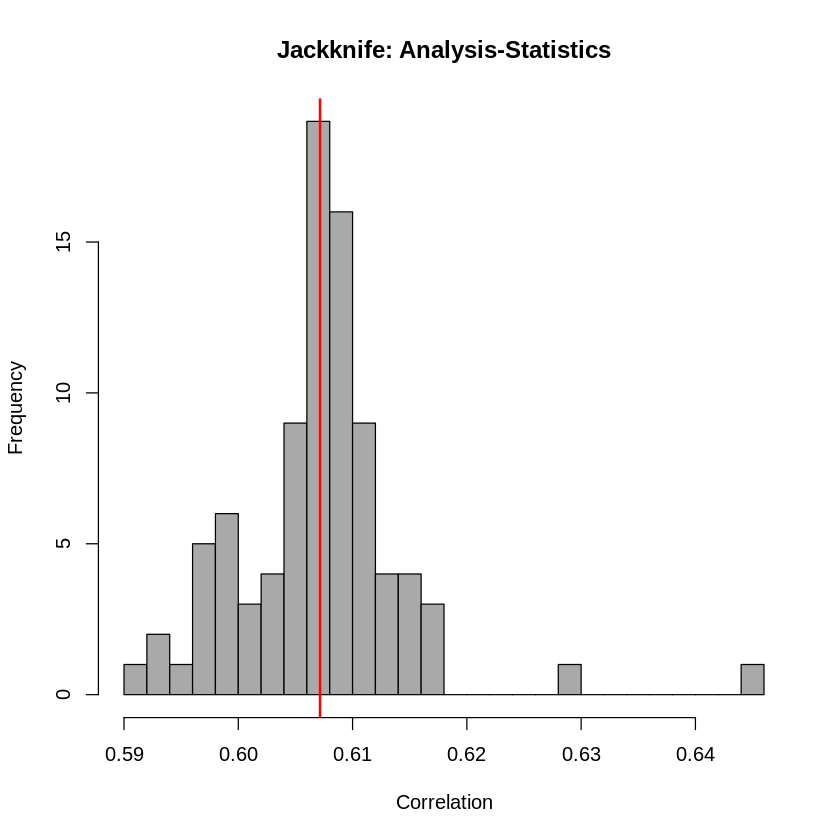

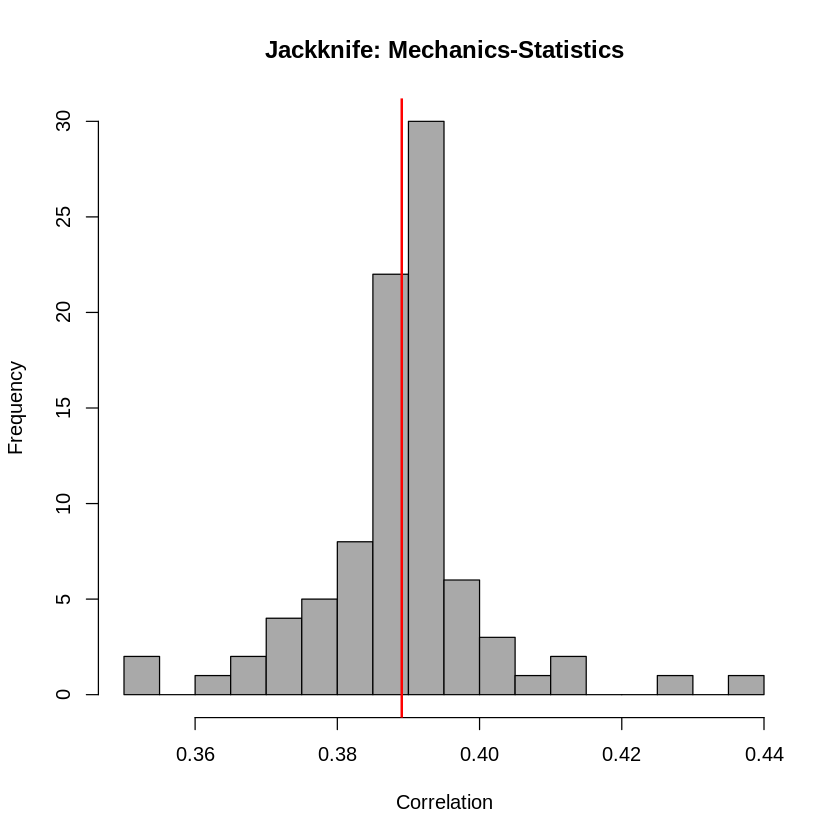

In [40]:
hist(jackknife_sample_cor_mec_vec,
     main = "Jackknife: Mechanics-Vectors",
     xlab = "Correlation",
     ylab = "Frequency",
     col = "darkgrey",
     breaks = 30)
abline(v = mean(jackknife_sample_cor_mec_vec), col = "red", lwd = 2)

hist(jackknife_sample_cor_ana_stat,
     main = "Jackknife: Analysis-Statistics",
     xlab = "Correlation",
     ylab = "Frequency",
     col = "darkgrey",
     breaks = 30)
abline(v = mean(jackknife_sample_cor_ana_stat), col = "red", lwd = 2)

hist(jackknife_sample_cor_mec_stat,
     main = "Jackknife: Mechanics-Statistics",
     xlab = "Correlation",
     ylab = "Frequency",
     col = "darkgrey",
     breaks = 30)
abline(v = mean(jackknife_sample_cor_mec_stat), col = "red", lwd = 2)

#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.

Rule of thumb, we need to correct an estimate for bias if |bias|/SE > 2.5

In [41]:

cat("\n\n----Bootstrap------")
cat("\nAbs of Bias over SE for Mechanics & Vector",abs(Bias_mec_vec)/SE_mec_vec)
cat("\nAbs of Bias over SE for Analysis & Statistics",abs(Bias_ana_stat)/SE_ana_stat)
cat("\nAbs of Bias over SE for Mechanics & Statistics",abs(Bias_mec_stat)/SE_mec_stat)

cat("\n\n----Jacknife------")
cat("\nAbs of Bias over SE for Mechanics & Vector",abs(Bias_mec_vec_jk)/SE_mec_vec_jk)
cat("\nAbs of Bias over SE for Analysis & Statistics",abs(Bias_ana_stat_jk)/SE_ana_stat_jk)
cat("\nAbs of Bias over SE for Mechanics & Statistics",abs(Bias_mec_stat_jk)/SE_mec_stat_jk)



----Bootstrap------
Abs of Bias over SE for Mechanics & Vector 0.07558611
Abs of Bias over SE for Analysis & Statistics 0.04075279
Abs of Bias over SE for Mechanics & Statistics 0.03103648

----Jacknife------
Abs of Bias over SE for Mechanics & Vector 0.06498751
Abs of Bias over SE for Analysis & Statistics 0.02118875
Abs of Bias over SE for Mechanics & Statistics 0.03135603

By rule of thumb, we can say that biases are not serious enough to adjust, because for all Bootstrap and Jackknife estimates, abs(Bias)/SE is less than 2.5

### Exercise 2

**Explain all parts in video**

In principle component analysis,

$$
\theta = \frac{\lambda_1}{\sum_{j=1}^{5}\lambda_j}
$$

represents the amount of variance explained by the largest eigenvector (to which this eigenvalue corresponds), which you can get by eigenvalue decomposition of the correlation matrix $\Sigma$. The eigenvector corresponding to the largest eigenvalue gives you the direction in which the data varies most!

For the data in `scor`, you can estimate $\theta$ using

$$
\hat{\theta} = \frac{\hat{\lambda_1}}{\sum_{j=1}^{5}\hat{\lambda_j}}
$$

by following these steps:

1. Calculate sample correlation $\hat{\Sigma}$
2. Use eigenvalue decomposition to get $\hat{\lambda_i}$ for i = 1, ..., 5
3. Let the largest $\hat{\lambda_i}$ be $\hat{\lambda_1}$
4. Compute $\hat{\theta}$ from your obtained values


In [42]:
#Calculate sample correlation
cor_matrix <- cor(scor)
#Eigen Decomposition
eigen_decomp <- eigen(cor_matrix)
eigenvalues <- eigen_decomp$values
eigenvectors <- eigen_decomp$vectors
#fetch largest eigen value
max_eigenvalues<- max(eigenvalues)
#calculate theta hat from given formula
theta_hat <- max_eigenvalues/ sum(eigenvalues)
cat("Theta Estimate:", theta_hat)


Theta Estimate: 0.636196

#### a) Compute the se and bias of this estimator using 2000 bootstrap estimates. Put the results in a table please and draw a histogram of the bootstrapped esitmates!

** Hint** For the bootstrapped bias, with set.seed(1), I got `-0.001415296`.




 Standard Error of Estimate for Bootstrapped sample: 0.04208801
 Bias of Estimate for Bootstrapped sample: -0.001415296

Estimate Bootstrap_SE Bootstrap_Bias
1 0.636196 0.04208801   -0.001415296

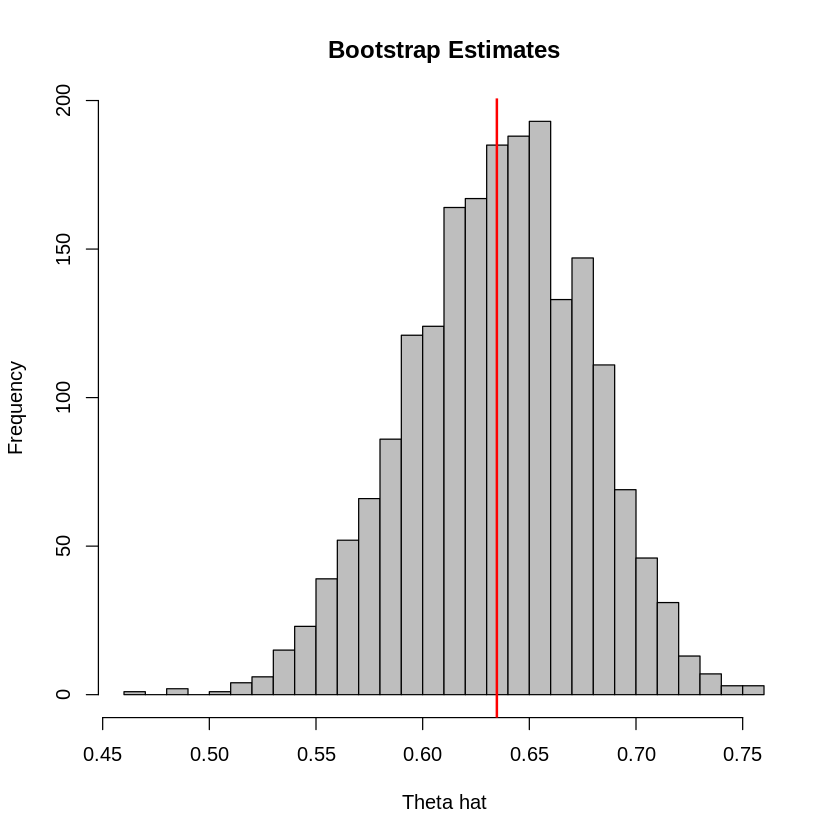

In [43]:
set.seed(1)
#Bootstrap settings
B <- 2000
bootstrapped_theta <- rep(NA, B)

for (b in 1:B) {
  #generate bootstrap samples
  bootstrapped_sample <- scor[sample(1:nrow(scor), size = 88, replace = TRUE), ]
  sample_cor_matrix <- cor(bootstrapped_sample)
  #Eigen Decomposition
  sample_eigen_decomp <- eigen(sample_cor_matrix)
  sample_eigenvalues <- sample_eigen_decomp$values
  sample_eigenvectors <- sample_eigen_decomp$vectors
  max_sample_eigenvalues<- max(sample_eigenvalues)
  #calculate estimate for bootstrap sample
  bootstrapped_theta[b] <- max_sample_eigenvalues/ sum(sample_eigenvalues)
}

# standard error and bias
SE_theta=sd(bootstrapped_theta)
Bias_theta=mean(bootstrapped_theta)-theta_hat
cat("\n Standard Error of Estimate for Bootstrapped sample:",SE_theta)
cat("\n Bias of Estimate for Bootstrapped sample:",Bias_theta)

#create a dataframe to show results as table
bootstrap_results <- data.frame(
  Estimate = theta_hat,
  Bootstrap_SE = SE_theta,
  Bootstrap_Bias = Bias_theta
)
bootstrap_results

#Bootstrap Histograms
hist(bootstrapped_theta,
     main = "Bootstrap Estimates",
     xlab = "Theta hat",
     ylab = "Frequency",
     col = "grey",
     breaks = 30)
abline(v = mean(bootstrapped_theta), col = "red", lwd = 2)



#### b) Compute the se and bias of this estimator using the jackknife estimates. Put the results in a table please and draw a histogram of the jackknifed estimates!

** Hint** For the jackknifed bias, I got `-0.0003778535`.





 Standard Error of Estimate for Jackknife sample: 0.04466684
 Bias of Estimate for Jackknife sample: -0.0003778535

Estimate Jackknife_SE Jackknife_Bias
1 0.636196 0.04466684   -0.0003778535

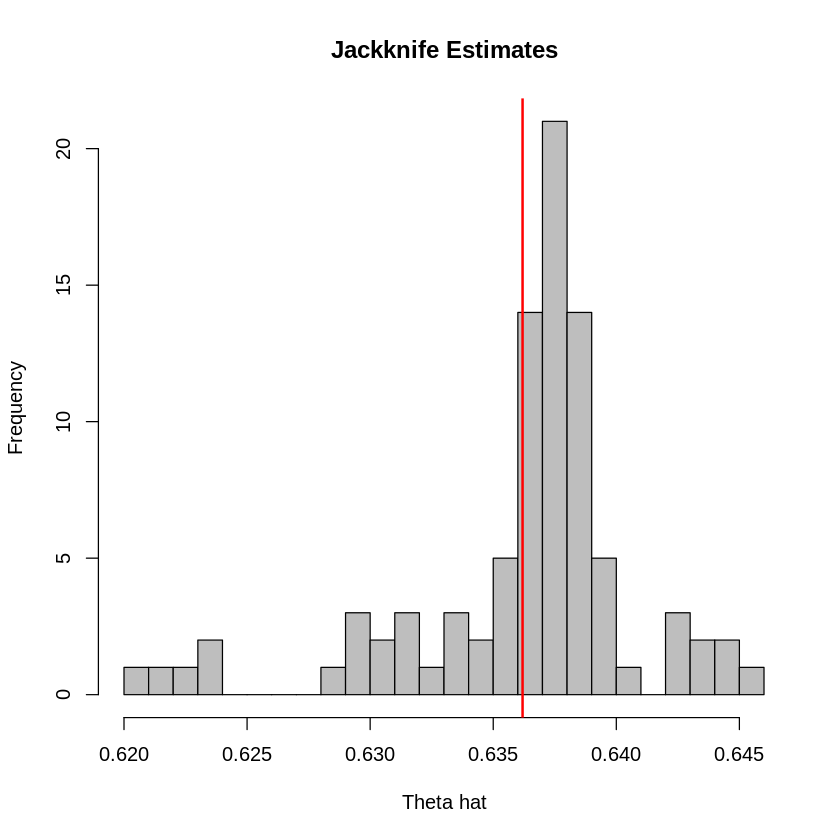

In [44]:
set.seed(1)
#Jootstrap settings
J <- nrow(scor)
jackknife_theta <- rep(NA, J)

for (j in 1:J) {
  #generate jackknife samples
  jackknife_sample <- scor[-j,]
  sample_cor_matrix <- cor(jackknife_sample)
  #Eigen Decomposition
  sample_eigen_decomp <- eigen(sample_cor_matrix)
  sample_eigenvalues <- sample_eigen_decomp$values
  sample_eigenvectors <- sample_eigen_decomp$vectors
  max_sample_eigenvalues<- max(sample_eigenvalues)
  #calculate estimate for bootstrap sample
  jackknife_theta[j] <- max_sample_eigenvalues/ sum(sample_eigenvalues)
}

# standard error and bias
SE_theta_JK=sqrt((J - 1) / J * sum((jackknife_theta - mean(jackknife_theta))^2))
Bias_theta_JK=(J - 1) * (mean(jackknife_theta) - theta_hat)
cat("\n Standard Error of Estimate for Jackknife sample:",SE_theta_JK)
cat("\n Bias of Estimate for Jackknife sample:",Bias_theta_JK)

#create a dataframe to show results as table
jackknife_results <- data.frame(
  Estimate = theta_hat,
  Jackknife_SE = SE_theta_JK,
  Jackknife_Bias = Bias_theta_JK
)
jackknife_results

#Jootstrap Histograms
hist(jackknife_theta,
     main = "Jackknife Estimates",
     xlab = "Theta hat",
     ylab = "Frequency",
     col = "grey",
     breaks = 30)
abline(v = mean(jackknife_theta), col = "red", lwd = 2)


#### c) Are any of the biases considered serious enough to adjust for? Explain why or why not.

Rule of thumb, we need to correct an estimate for bias if |bias|/SE > 2.5

In [45]:
cat("\n\n----Bootstrap------")
cat("\nAbs of Bias over SE",abs(Bias_theta)/SE_theta)

cat("\n\n----Jacknife------")
cat("\nAbs of Bias over SE ",abs(Bias_theta_JK)/SE_theta_JK)



----Bootstrap------
Abs of Bias over SE 0.03362706

----Jacknife------
Abs of Bias over SE  0.008459373

By rule of thumb, we can say that biases are not serious enough to adjust, because for both Bootstrap and Jackknife estimates abs(Bias)/SE is less than 2.5

### Optional: Exercise 3 (worth 5 points EC on HW if you do it and explain it well)


You are presented with incomplete data from two coins, one copper and one silver.
The copper coin has $p1$ probability of landing heads up while the silver coin has $p2$ probability of landing heads up.

The data you see below, called "X", consists of $100$ coin tosses, where one of the two coins is selected at random and then tossed. If the coin lands heads up, a 1 is recorded for that toss. Otherwise, a 0 is recorded. You do not know which coin is used for each toss.

Use the EM algorithm to estimate $p1$ and $p2$. Please show your work for how you derive $Q(\theta_{t}|\theta_{t-1}, X)$ as well as the code to implement the EM algorithm and produce estimates for $p1$ and $p2$.




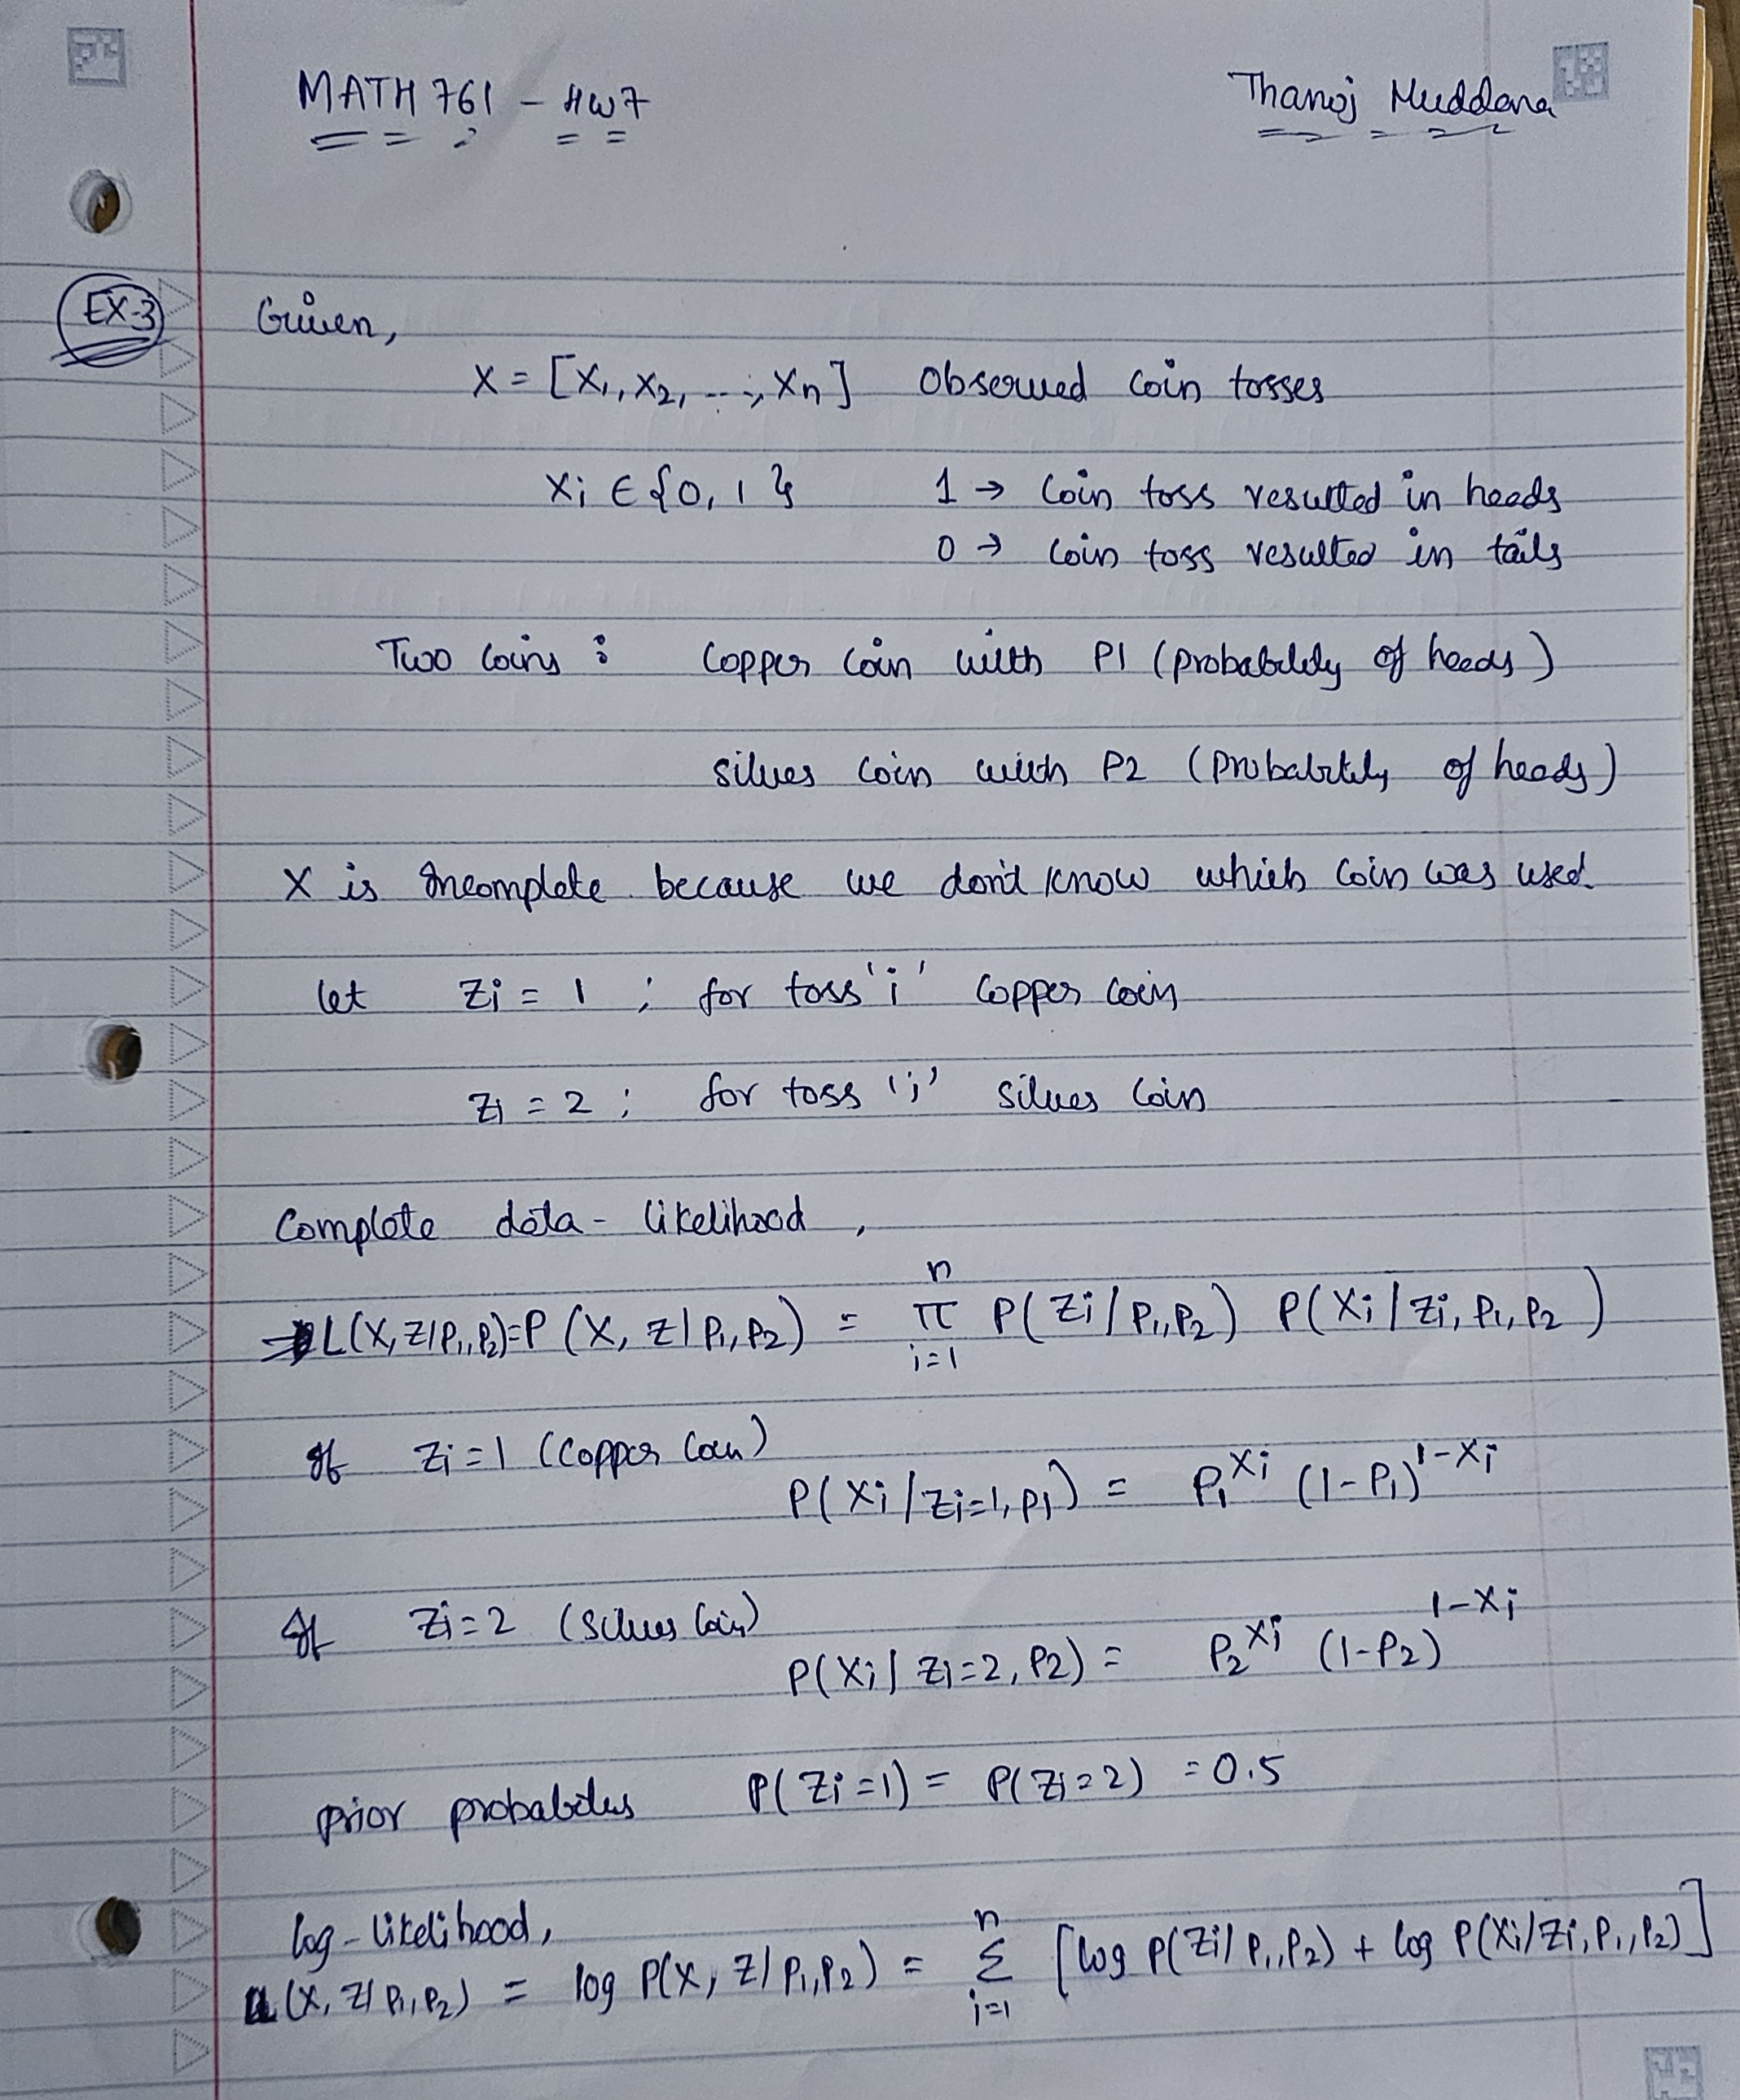

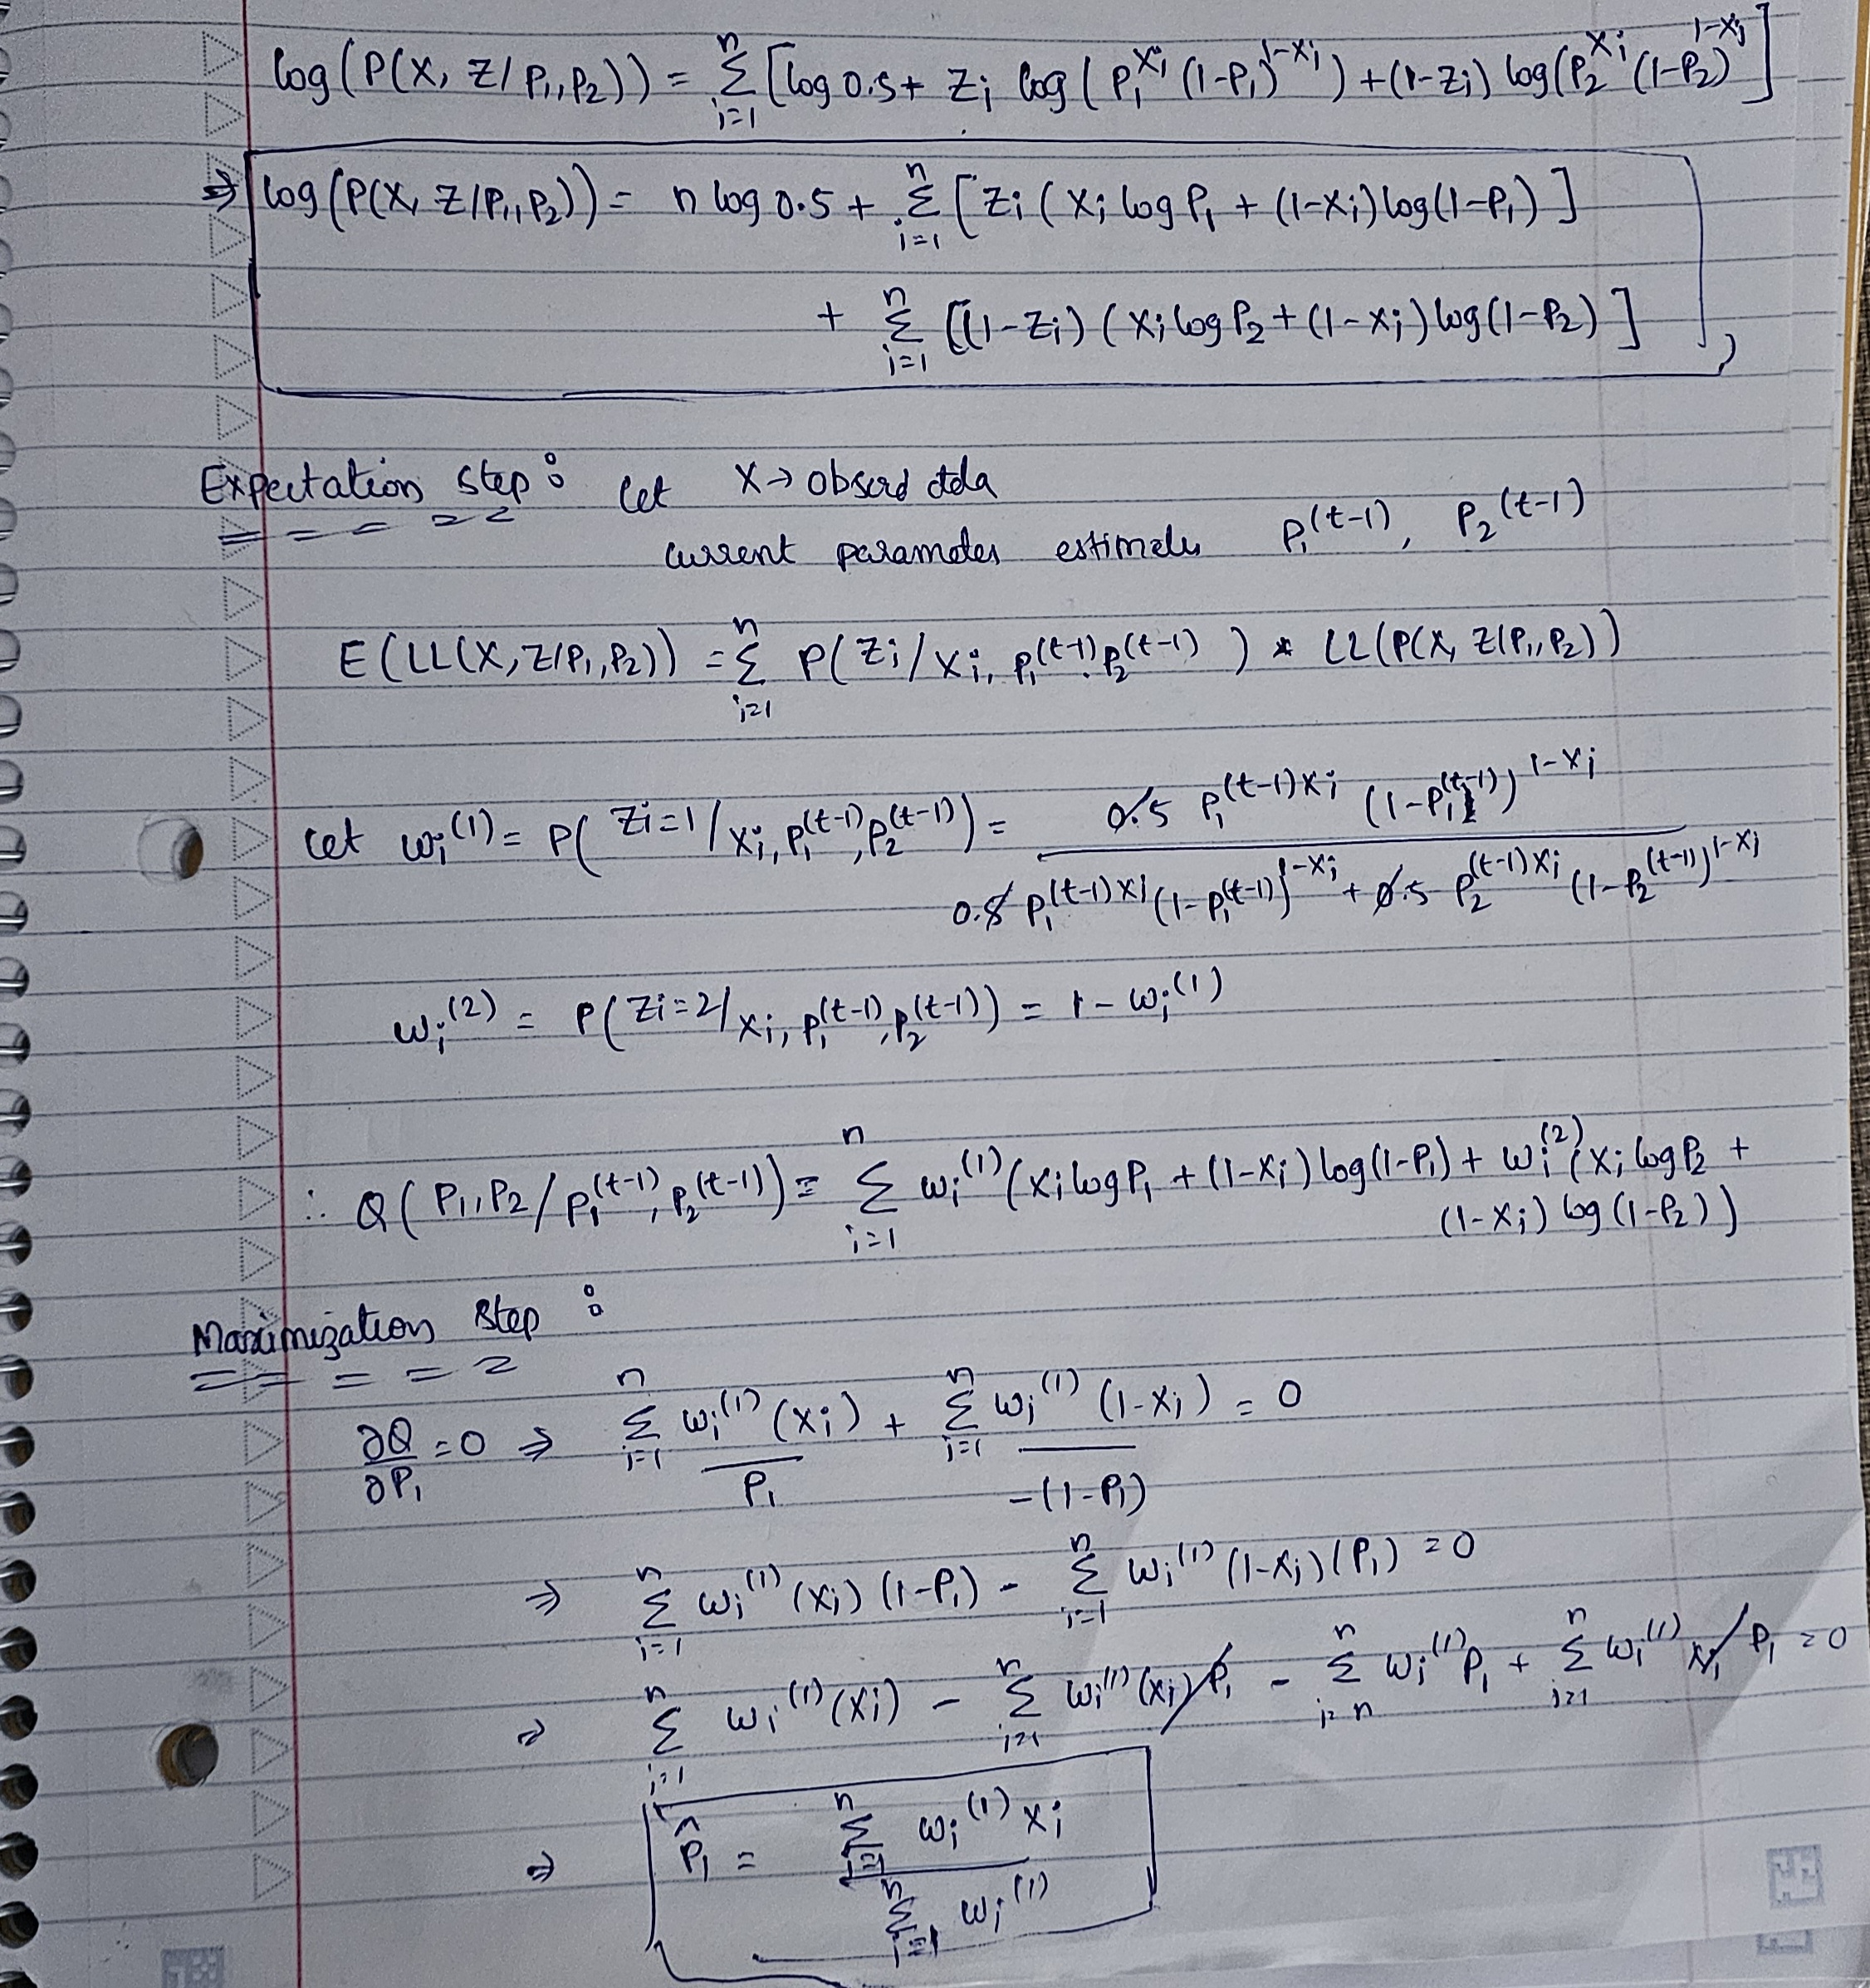
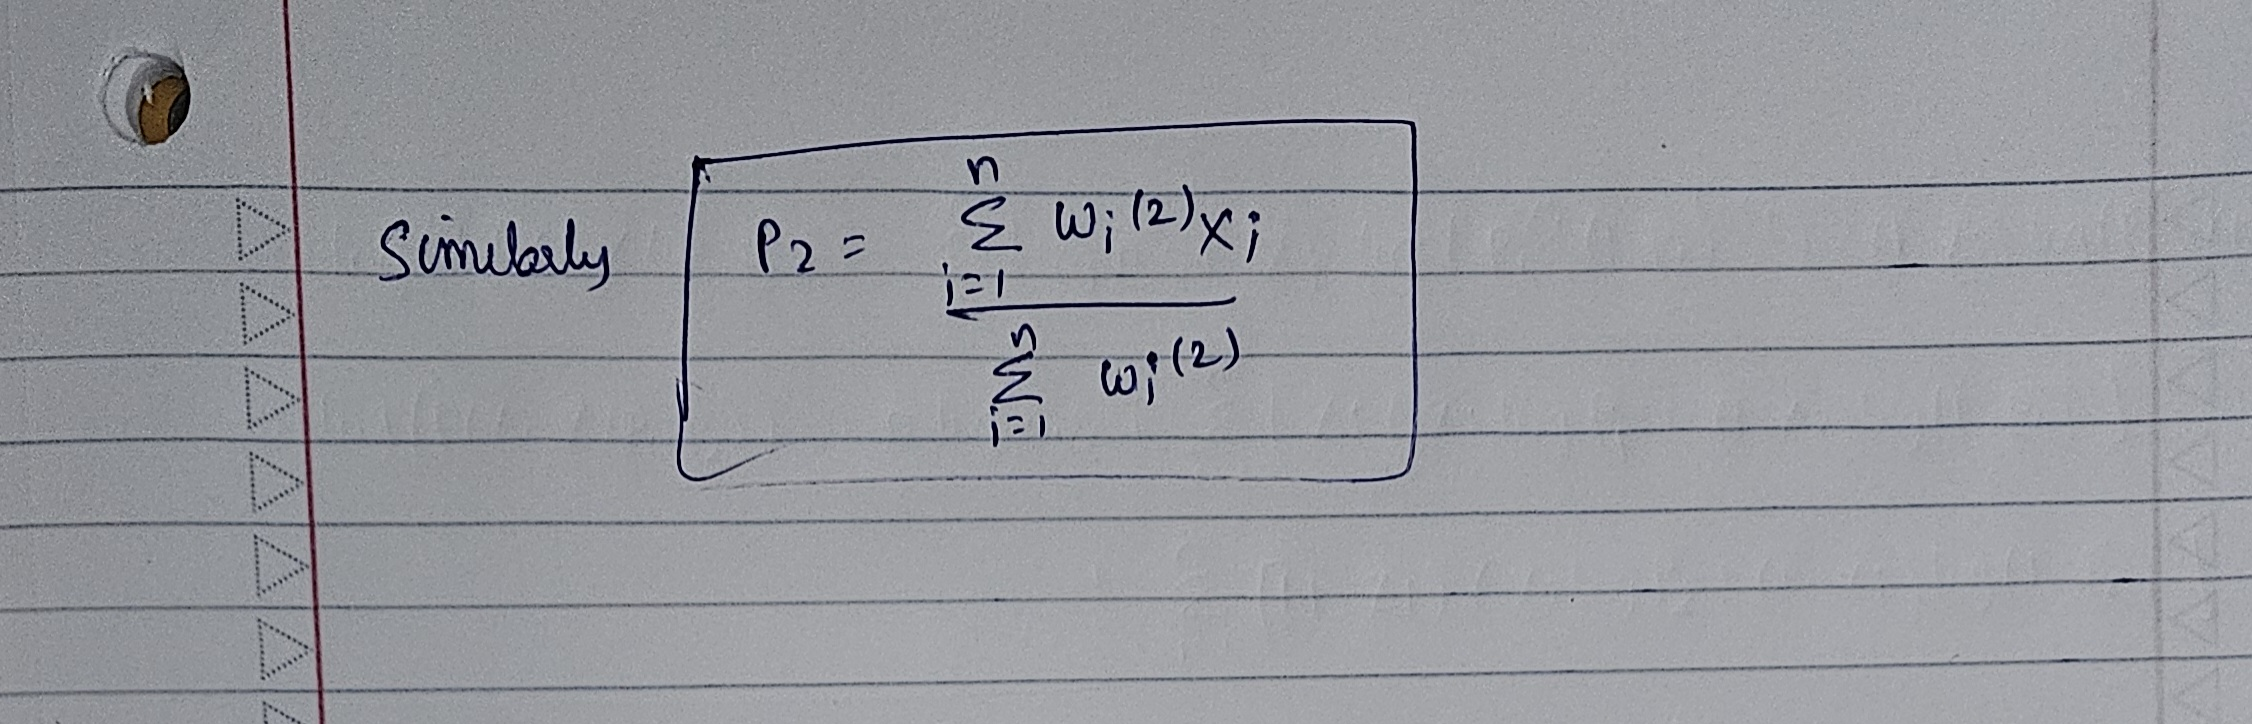

In [46]:
X =c(1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,
     1,0,1,1,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,0,1,
     1,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,
     1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,
     1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1)
#parameter settings
tolerance=.Machine$double.eps^5
p1 <- 0.7  # Initial guess for p1
p2 <- 0.5  # Initial guess for p2
max_iter <- 1000
n <- length(X)

# EM Algorithm
for (iter in 1:max_iter) {
  # E-Step
  w1 <- p1^X * (1 - p1)^(1 - X)  # Likelihood of X given coin 1
  w2 <- p2^X * (1 - p2)^(1 - X)  # Likelihood of X given coin 2

  w1_norm <- w1 / (w1 + w2)  # Posterior probability of coin 1
  w2_norm <- w2 / (w1 + w2)  # Posterior probability of coin 2

  # M-Step
  p1_new <- sum(w1_norm * X) / sum(w1_norm)  # Update p1
  p2_new <- sum(w2_norm * X) / sum(w2_norm)  # Update p2

  # Convergence check
  if (abs(p1 - p1_new) < tolerance && abs(p2 - p2_new) < tolerance) {
    break
  }

  # Update parameters
  p1 <- p1_new
  p2 <- p2_new
}

# Results
cat("Estimated p1 (Copper Coin):", p1, "\n")
cat("Estimated p2 (Silver Coin):", p2, "\n")


Estimated p1 (Copper Coin): 0.6532655 
Estimated p2 (Silver Coin): 0.4467345 


### Self assessment:

Remember to take a moment to evaluate yourself on where you feel confident in your work and understanding and where you feel less confident in your work and understanding.